 <span style='background :white' ><span style='color :red' > CLEANING DATA(NULL VALUE REMOVAL,OUTLIER IDENTIFICATION) DROPPING ROWS/COLUMNS , IMPUTATION AND REASON TO DROP</span></span>

DATA PREPROCESSING

In [693]:
# importing libraries and setting max rows display
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
pd.set_option('display.max_rows', 10000)

In [694]:
# reading dataset
dataset=pd.read_csv("Data_Train.csv")

In [695]:
dataset.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


just checking the variables 

In [696]:
# here i have written code for selecting the rows which have more than 3 or more missing values
index=[]
for i in range(6019):
    x=[]
    count=0
    for j in range(12):
        x.append(dataset.iloc[i,j])
    for k in x:
        if type(k) is float or type(k) is numpy.float64:
            if math.isnan(k):
                count=count+1
        if (count)>=3:
            index.append(i)
            count=0
print(index)

[194, 208, 733, 749, 1294, 1327, 1385, 1460, 2074, 2096, 2264, 2325, 2335, 2530, 2542, 2623, 2668, 2737, 2780, 2842, 3272, 3404, 3520, 3522, 3810, 4011, 4152, 4229, 4577, 4604, 4697, 4712, 4952, 5015, 5185, 5270]


In [697]:
print(len(dataset))
model_name=np.array([])
model_name=dataset.iloc[:,0]
location=np.array([])
year=np.array([])
km_driven=np.array([])
fuel_type=np.array([])
transmission=np.array([])
owner=np.array([])
mileage=np.array([])
engine=np.array([])
power=np.array([])
seats=np.array([])
price=np.array([])
location=dataset.iloc[:,1]
year=dataset.iloc[:,2]
km_driven=dataset.iloc[:,3]
fuel_type=dataset.iloc[:,4]
transmission=dataset.iloc[:,5]
owner=dataset.iloc[:,6]
mileage=dataset.iloc[:,7]
engine=dataset.iloc[:,8]
power=dataset.iloc[:,9]
seats=dataset.iloc[:,10]
price=dataset.iloc[:,11]
#6019

6019


OUTLIER DETECTION IN KM_DRIVEN SECTION ONE VALUE HAS MORE THAN 6 TIMES THE 2ND MAX VALUE AND ADDING IT TO INDICES OF ROWS THAT HAS TO BE REMOVED FROM DATASET

In [698]:
print(index)
print("---------------------------------------------")
a=[]
count=0
for i in km_driven:
    if i>400000:
        print(count)
    count=count+1
index=index+[340,358,1860,2328,2823,3092,4491]
print(index)

[194, 208, 733, 749, 1294, 1327, 1385, 1460, 2074, 2096, 2264, 2325, 2335, 2530, 2542, 2623, 2668, 2737, 2780, 2842, 3272, 3404, 3520, 3522, 3810, 4011, 4152, 4229, 4577, 4604, 4697, 4712, 4952, 5015, 5185, 5270]
---------------------------------------------
340
358
1860
2328
2823
3092
4491
[194, 208, 733, 749, 1294, 1327, 1385, 1460, 2074, 2096, 2264, 2325, 2335, 2530, 2542, 2623, 2668, 2737, 2780, 2842, 3272, 3404, 3520, 3522, 3810, 4011, 4152, 4229, 4577, 4604, 4697, 4712, 4952, 5015, 5185, 5270, 340, 358, 1860, 2328, 2823, 3092, 4491]


In [699]:
# removing the units of the terms in mileage,engine and power terms of the column
count=0
power1=power.copy()
for i in power1:
    x=''
    if type(i) is float:
        i=str(i)
    for j in i:
        if j=="1" or j=="2" or j=="3" or j=="4" or j=="5" or j=="6" or j=="7" or j=="8" or j=="9" or j=="0" or j=="." :
            x=x+j
        if x=="":
            x=0
    power1[count]=float(x)#try iloc
    count=count+1  
#print(len(power1))
#6019


##############################################################################################################################



count=0
engine1=engine.copy()
for i in engine1:
    x=''
    if type(i) is float:
        i=str(i)
    for j in i:
        if j=="1" or j=="2" or j=="3" or j=="4" or j=="5" or j=="6" or j=="7" or j=="8" or j=="9" or j=="0" or j=="." :
            x=x+j
        if x=="":
            x=0
    engine1[count]=float(x)
    count=count+1
    
    
    
##################################################################################################################



count=0
mileage1=mileage.copy()
for i in mileage1:
    x=''
    if type(i) is float:
        i=str(i)
    for j in i:
        if j=="1" or j=="2" or j=="3" or j=="4" or j=="5" or j=="6" or j=="7" or j=="8" or j=="9" or j=="0" or j=="." :
            x=x+j
        if x=="":
            x=0
    mileage1[count]=float(x)
    count=count+1  
    
    
    
#########################################################################################################################


count=0
seats1=seats.copy()
for i in seats1:
    x=''
    if type(i) is float:
        i=str(i)
    for j in i:
        if j=="1" or j=="2" or j=="3" or j=="4" or j=="5" or j=="6" or j=="7" or j=="8" or j=="9" or j=="0" or j=="." :
            x=x+j
        if x=="":
            x=0
    seats1[count]=float(x)
    count=count+1  
#6019



In [700]:
# here i am imputing the missing values in the rows by their mean in the complete column of the dataset
# function for average calculation
def avrg(x):
    sum=0
    count=0
    for i in x:
        sum=sum+i
        count=count+1
    average=sum/count
    return(average)
######################################
avg=avrg(power1)
count=0
for i in power1:
    if i==0:
        power1.iloc[count]=avg
    count=count+1
#######################################
avg=avrg(engine1)
count=0
for i in engine1:
    if i==0:
        engine1.iloc[count]=avg
    count=count+1
######################################
avg=avrg(mileage1)
count=0
for i in mileage1:
    if i==0:
        mileage1.iloc[count]=avg
    count=count+1
######################################     
avg=avrg(seats1)
count=0
for i in seats1:
    if i==0:
        seats1.iloc[count]=avg
    count=count+1
######################################     

#6019

data={"Name":model_name,
      "Location":location,
      "Year":year,
      "Kilometers_Driven":km_driven,
      "Fuel_Type":fuel_type,
      "Transmission":transmission,
      "Owner_Type":owner,
      "Mileage":mileage1,
      "Engine":engine1,
      "Power":power1,
      "Seats":seats1,
      "Price":price,
}
df=pd.DataFrame(data)


for i in index:
    df.drop(i,inplace=True)
print("length after droping")
print(len(df))


x=np.array([])
x=df
print(len(x))
x.to_csv("new",index=False)
new=pd.read_csv("new")
new.head()
model_name=np.array([])
model_name=new.iloc[:,0]
location=np.array([])
year=np.array([])
km_driven=np.array([])
fuel_type=np.array([])
transmission=np.array([])
owner=np.array([])
mileage=np.array([])
engine=np.array([])
power=np.array([])
seats=np.array([])
price=np.array([])
location=new.iloc[:,1]
year=new.iloc[:,2]
km_driven=new.iloc[:,3]
fuel_type=new.iloc[:,4]
transmission=new.iloc[:,5]
owner=new.iloc[:,6]
mileage=new.iloc[:,7]
engine=new.iloc[:,8]
power=new.iloc[:,9]
seats=new.iloc[:,10]
price=new.iloc[:,11]
#5976
new.head()

length after droping
5976
5976


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


by just going through the data once we can see that generally data is missing in rows not in significant numbers in columns. as 3 columns of 12 columns given in a row accounts for 25%

<span style='background :yellow' ><span style='color :green' >(REASON-)</span></span>

<span style='background :white' ><span style='color :red' >UNIVARIATE AND BIVARIATE ANALYSIS</span></span>

---------------------------frequency of the property of the given car type--------------------------


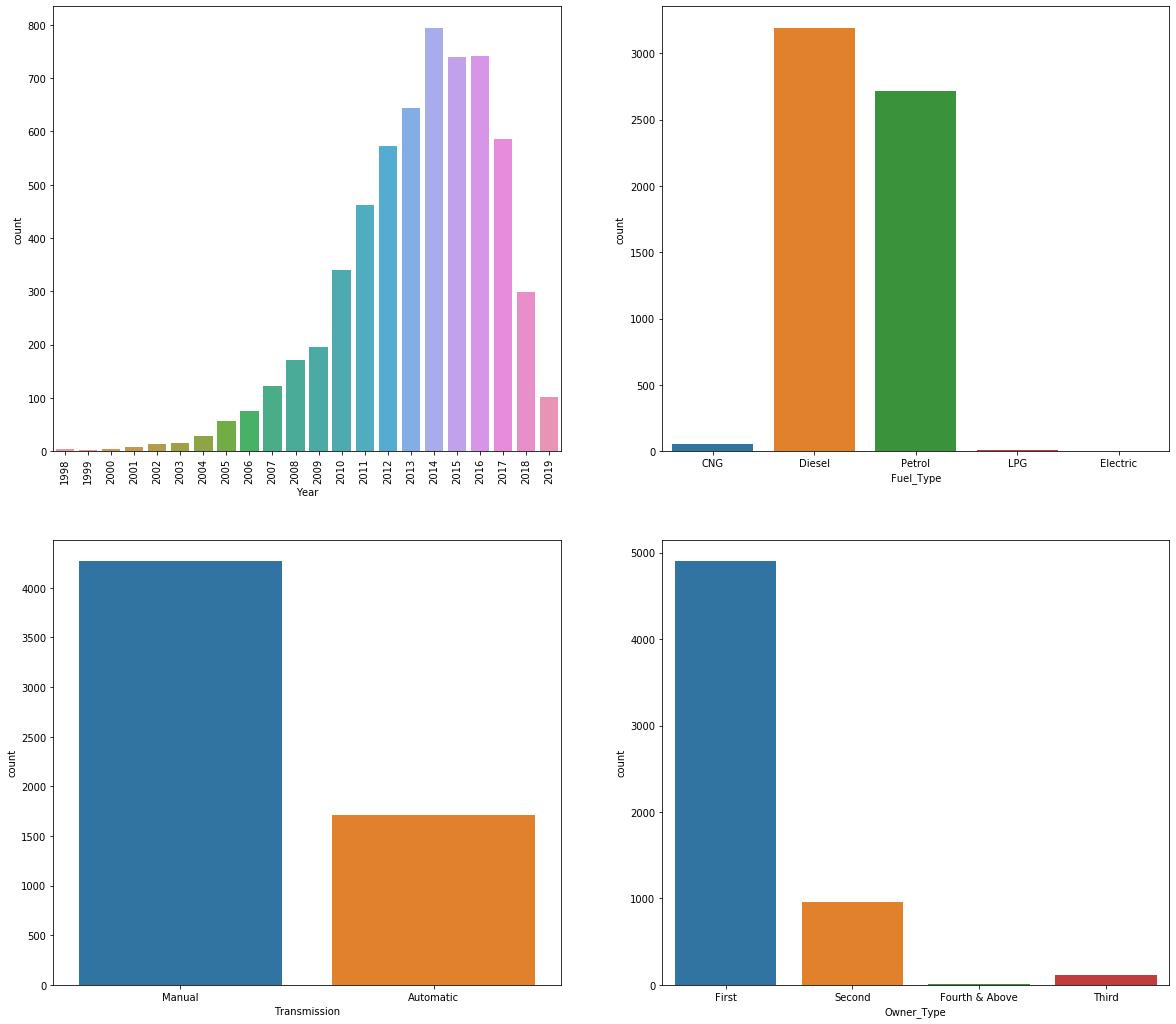

In [701]:
print("---------------------------frequency of the property of the given car type--------------------------")
fig = plt.figure(figsize=(20,18))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
fig.add_subplot(2,2,1)
g1 = sns.countplot(x='Year', data=new)
loc,labels = plt.xticks()
g1.set_xticklabels(labels,rotation=90)
fig.add_subplot(2,2,2)
g2 = sns.countplot(x='Fuel_Type', data=new)
loc,labels = plt.xticks()
g2.set_xticklabels(labels,rotation=0)
fig.add_subplot(2,2,3)
g3 = sns.countplot(x='Transmission', data=new)
loc,labels = plt.xticks()
g3.set_xticklabels(labels,rotation=0)
fig.add_subplot(2,2,4)
g4 = sns.countplot(x='Owner_Type', data=new)
loc,labels = plt.xticks()
g4.set_xticklabels(labels,rotation=0)
plt.show()


----------------frequency of the property of the given car type------------------


[Text(0, 0, 'Mumbai'),
 Text(0, 0, 'Pune'),
 Text(0, 0, 'Chennai'),
 Text(0, 0, 'Coimbatore'),
 Text(0, 0, 'Hyderabad'),
 Text(0, 0, 'Jaipur'),
 Text(0, 0, 'Kochi'),
 Text(0, 0, 'Kolkata'),
 Text(0, 0, 'Delhi'),
 Text(0, 0, 'Bangalore'),
 Text(0, 0, 'Ahmedabad')]

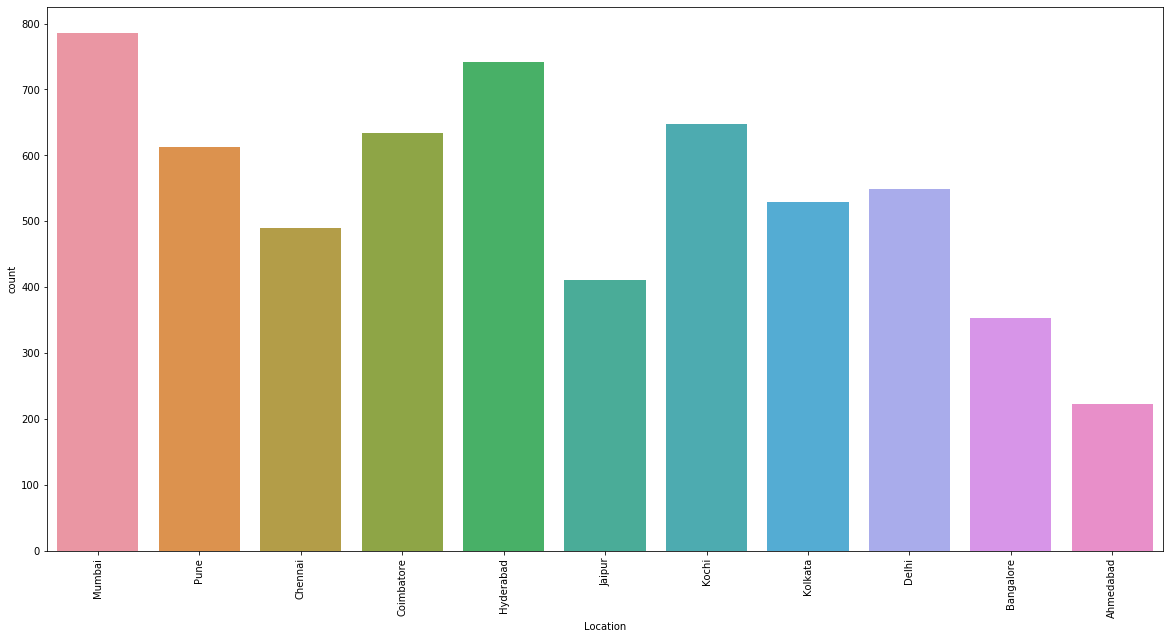

In [702]:
print("----------------frequency of the property of the given car type------------------")
fig = plt.figure(figsize=(20,10))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
fig.add_subplot(1,1,1)
g1 = sns.countplot(x='Location', data=new)
loc,labels = plt.xticks()
g1.set_xticklabels(labels,rotation=90)

frequency of the property of the given car type


[Text(0, 0, 'Maruti'),
 Text(0, 0, 'Hyundai'),
 Text(0, 0, 'Honda'),
 Text(0, 0, 'Audi'),
 Text(0, 0, 'Nissan'),
 Text(0, 0, 'Toyota'),
 Text(0, 0, 'Volkswagen'),
 Text(0, 0, 'Tata'),
 Text(0, 0, 'Land'),
 Text(0, 0, 'Mitsubishi'),
 Text(0, 0, 'Renault'),
 Text(0, 0, 'Mercedes-Benz'),
 Text(0, 0, 'BMW'),
 Text(0, 0, 'Mahindra'),
 Text(0, 0, 'Ford'),
 Text(0, 0, 'Porsche'),
 Text(0, 0, 'Datsun'),
 Text(0, 0, 'Jaguar'),
 Text(0, 0, 'Volvo'),
 Text(0, 0, 'Chevrolet'),
 Text(0, 0, 'Skoda'),
 Text(0, 0, 'Mini'),
 Text(0, 0, 'Fiat'),
 Text(0, 0, 'Jeep'),
 Text(0, 0, 'Smart'),
 Text(0, 0, 'Ambassador'),
 Text(0, 0, 'Isuzu'),
 Text(0, 0, 'ISUZU'),
 Text(0, 0, 'Force'),
 Text(0, 0, 'Bentley'),
 Text(0, 0, 'Lamborghini')]

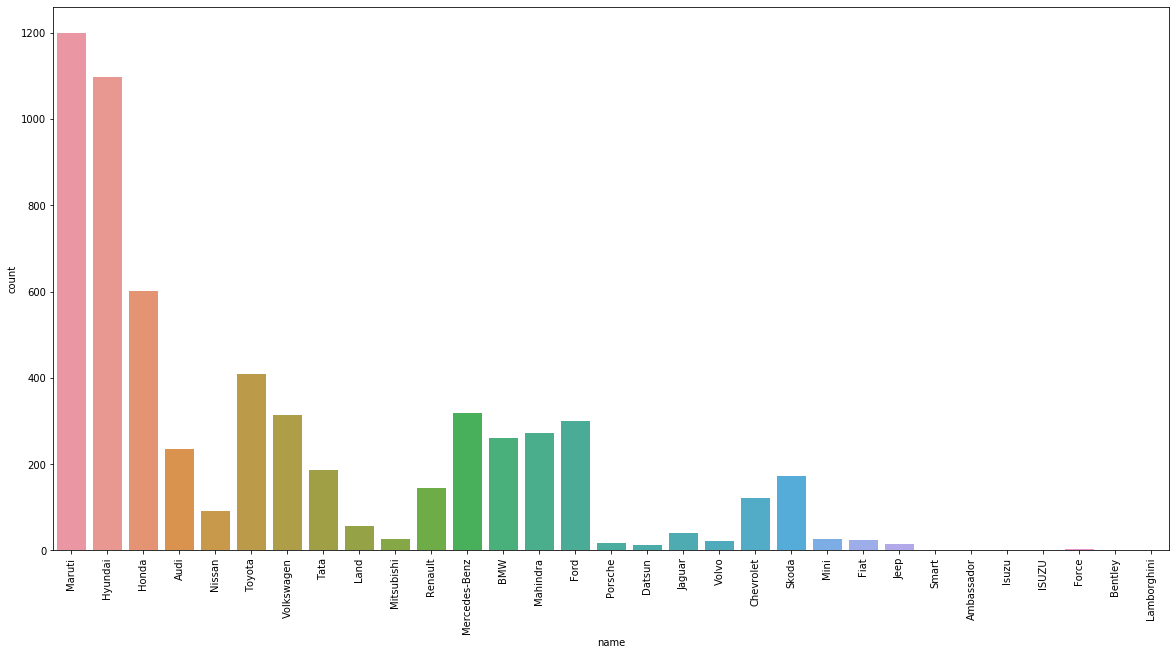

In [703]:
# BRAND TYPE SEGEARTION
a=[]
count=0
for i in model_name:
    x=''
    for j in i:
        if j==" ":
            break
        else:
            x=x+j
    a.append(x)        
    count=count+1
a=np.array(a)
data={"name":a
    
}
a=pd.DataFrame(data)
a.to_csv("model",index=False)
a=pd.read_csv("model")

print("--------------------frequency of the property of the given car type---------------")
fig = plt.figure(figsize=(20,10))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
fig.add_subplot(1,1,1)
g1 = sns.countplot(x='name',data=a)
loc,labels = plt.xticks()
g1.set_xticklabels(labels,rotation=90)

1. PEOPLE USE MORE DIESEL BASED CARS THE MOST THEN PETROL THEN CNG THEN LPG AND THEN ELECTRIC.
2. IN 2014 PEOPLE SHOWED MAXIMUM INTERSET IN CARS SINCE THEN IT IS ON DECLINE.
3. PEOPLE GO MORE WITH MANUAL THAN AUTOMATIC TRANSMISSION.
4. MUMBAI WAS THE MOST PREFERRED LOCATION.
5. MARUTI BRAND WAS THE MOST PREFERRED BRAND

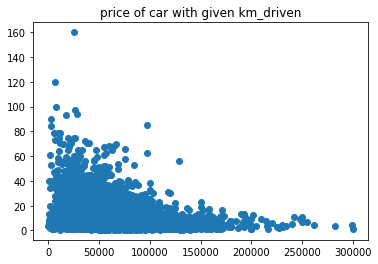

In [704]:
plt.scatter(km_driven,price)
plt.title("price of car with given km_driven")
plt.show()

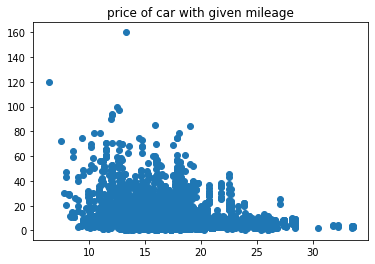

In [705]:
plt.scatter(mileage,price)
plt.title("price of car with given mileage")
plt.show()

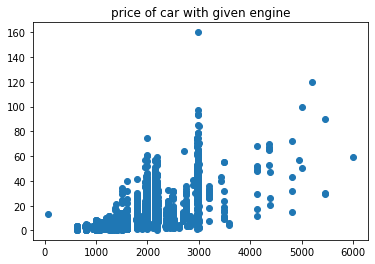

In [706]:
plt.scatter(engine,price)
plt.title("price of car with given engine")
plt.show()

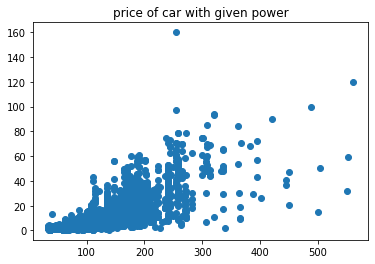

In [707]:
plt.scatter(power,price)
plt.title("price of car with given power")
plt.show()

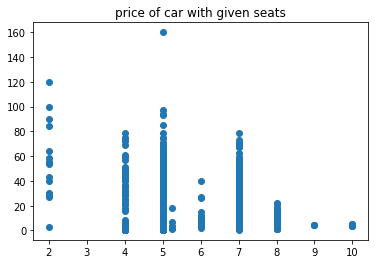

In [708]:
plt.scatter(seats,price)
plt.title("price of car with given seats")
plt.show()

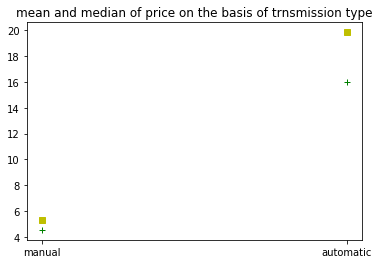

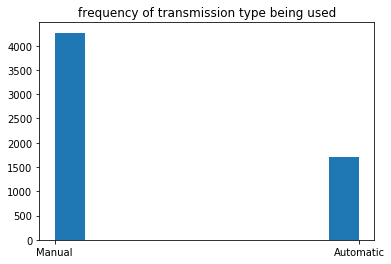

In [709]:
# MAKING FUNCTION FOR SEGREGATING FURTHER IN EACH EACH PROPERTY THEN FINDING MEAN AND MEDIAN OF THE FURTHER 
# SEGERATTED GROUP AND COMPARING THERE PRICES
a=[]
b=[]
count=0
for i in transmission:
    if i=="Manual":
        a.append(price[count])
    if i=="Automatic":
        b.append(price[count])
    count=count+1
a=np.array(a)
b=np.array(b)
mean1=np.mean(a)
mean2=np.mean(b)
median1=np.median(a)
median2=np.median(b)
plt.plot("manual",mean1,'ys')
plt.plot("automatic",mean2,'ys')
plt.plot("manual",median1,'g+')
plt.plot("automatic",median2,'g+')
plt.title("mean and median of price on the basis of trnsmission type")
plt.show()
plt.hist(transmission)
plt.title("frequency of transmission type being used")
plt.show()

FROM HERE WE CAN INFERE THAT PRICE IS ONE OF THE MAJOR REASON FOR THE POPULARITY OF MANUAL TYPE

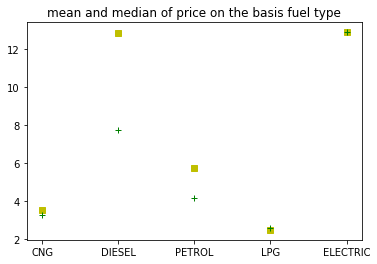

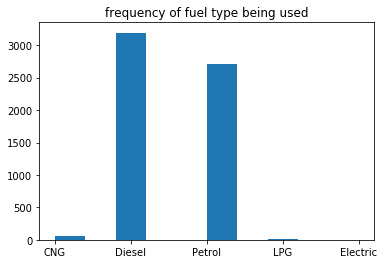

In [710]:
a=[]
b=[]
c=[]
d=[]
e=[]
count=0
for i in fuel_type:
    if i=="CNG":
        a.append(price[count])
    if i=="LPG":
        b.append(price[count])
    if i=="Electric":
        c.append(price[count])
    if i=="Petrol":
        d.append(price[count])
    if i=="Diesel":
        e.append(price[count])
    count=count+1
a=np.array(a)
b=np.array(b)
c=np.array(c)
d=np.array(d)
e=np.array(e)
mean1=np.mean(a)
mean2=np.mean(b)
mean3=np.mean(c)
mean4=np.mean(d)
mean5=np.mean(e)
median1=np.median(a)
median2=np.median(b)
median3=np.median(c)
median4=np.median(d)
median5=np.median(e)
plt.plot("CNG",mean1,'ys')
plt.plot("DIESEL",mean5,'ys')
plt.plot("PETROL",mean4,'ys')
plt.plot("LPG",mean2,'ys')
plt.plot("ELECTRIC",mean3,'ys')
plt.plot("CNG",median1,'g+')
plt.plot("DIESEL",median5,'g+')
plt.plot("PETROL",median4,'g+')
plt.plot("LPG",median2,'g+')
plt.plot("ELECTRIC",median3,'g+')
plt.title("mean and median of price on the basis fuel type")
plt.show()
plt.hist(fuel_type)
plt.title("frequency of fuel type being used")
plt.show()

FROM HERE WE CAN INFERE THAT PRICE IS NOT THE REASON COMPLETELY.

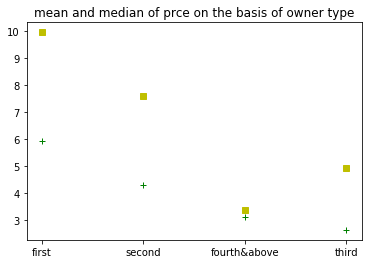

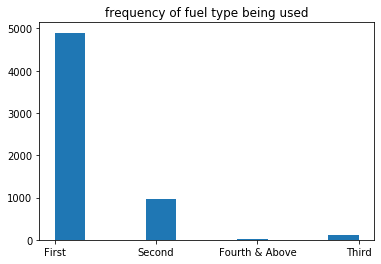

In [711]:
a=[]
b=[]
c=[]
d=[]
count=0
for i in owner:
    if i=="First":
        a.append(price[count])
    if i=="Second":
        b.append(price[count])
    if i=="Fourth & Above":
        c.append(price[count])
    if i=="Third":
        d.append(price[count])
    count=count+1
a=np.array(a)
b=np.array(b)
c=np.array(c)
d=np.array(d)
mean1=np.mean(a)
mean2=np.mean(b)
mean3=np.mean(c)
mean4=np.mean(d)
median1=np.median(a)
median2=np.median(b)
median3=np.median(c)
median4=np.median(d)
plt.plot("first",mean1,'ys')
plt.plot("second",mean2,'ys')
plt.plot("fourth&above",mean3,'ys')
plt.plot("third",mean4,'ys')
plt.plot("first",median1,'g+')
plt.plot("second",median2,'g+')
plt.plot("fourth&above",median3,'g+')
plt.plot("third",median4,'g+')
plt.title("mean and median of prce on the basis of owner type")
plt.show()
plt.hist(owner)
plt.title("frequency of fuel type being used")
plt.show()

In [ ]:
FROM HERE WE CAN INFERE THAT PRICE IS NOT THE REASON COMPLETELY.

<span style='background :white' ><span style='color :red' >SCALING KILOMETERS DRIVEN, ENGINE, POWER, PRICE,MILEAGE COLUMN</span></span>

In [712]:
#scaling value in range 1 to 2
def max(x):
    max1=0
    for i in x:
        if i>max1:
            max1=i
    return max1
def stunner(x,a):
    count=0
    y=[]
    for i in x:
        g=(i/a)+1
        y=y+[g]
        print(g)
        count=count+1
    return y

a=max(km_driven)
km_driven=stunner(km_driven,a)
km_driven=np.array([km_driven])
km_driven=np.transpose(km_driven)

#-------------------------------------------------------
a=max(engine)
engine=stunner(engine,a)
engine=np.array([engine])
engine=np.transpose(engine)

#-------------------------------------------------------
a=max(price)
price=stunner(price,a)
price=np.array([price])
price=np.transpose(price)
#-------------------------------------------------------
a=max(mileage)
mileage=stunner(mileage,a)
mileage=np.array([mileage])
mileage=np.transpose(mileage)

#-------------------------------------------------------
a=max(power)
power=stunner(power,a)
power=np.array([power])
power=np.transpose(power)


1.24
1.1366666666666667
1.1533333333333333
1.29
1.1355666666666666
1.25
1.2899966666666667
1.12
1.2147666666666668
1.2197733333333334
1.08564
1.2
1.2147466666666666
1.24
1.2833333333333332
1.3666666666666667
1.1965
1.0833333333333333
1.25823
1.2616666666666667
1.10994
1.18464
1.1866166666666667
1.15269
1.11
1.1730666666666667
1.18
1.18
1.1247666666666667
1.8733333333333333
1.2066666666666666
1.29205
1.24
1.1166666666666667
1.1847699999999999
1.2793866666666667
1.1669166666666666
1.1733333333333333
1.2833333333333332
1.2066666666666666
1.3
1.06566
1.0734433333333333
1.11829
1.15458
1.1733366666666667
1.19335
1.23568
1.25
1.2526666666666666
1.0454933333333334
1.1733333333333333
1.1766666666666667
1.2188333333333334
1.18
1.13
1.05514
1.1066666666666667
1.40604
1.131
1.0733333333333333
1.24
1.1933333333333334
1.2166666666666668
1.5933333333333333
1.21888
1.21
1.0512299999999999
1.21
1.0433333333333334
1.2433333333333334
1.1857633333333333
1.1505933333333334
1.1868866666666666
1.12433333333

1.3674133333333334
1.0700066666666666
1.4033333333333333
1.2450433333333333
1.1133333333333333
1.09457
1.2491833333333333
1.0860166666666666
1.2753433333333333
1.3666666666666667
1.2933333333333334
1.3666666666666667
1.05
1.2333333333333334
1.5
1.0633333333333332
1.1248066666666667
1.21037
1.2933333333333334
1.1411833333333332
1.2529033333333333
1.2166666666666668
1.23
1.2641066666666667
1.7333333333333334
1.0949
1.03253
1.25072
1.0266666666666666
1.19817
1.1799866666666667
1.05045
1.1766666666666667
1.1333333333333333
1.0703566666666666
1.1866666666666668
1.06541
1.2365433333333333
1.08585
1.1715
1.25
1.1261066666666666
1.14347
1.32412
1.2766666666666666
1.2166666666666668
1.1533566666666666
1.21975
1.245
1.1833333333333333
1.3833333333333333
1.1039466666666666
1.1391566666666666
1.1271433333333334
1.0634333333333332
1.06959
1.0785166666666666
1.0966666666666667
1.2033333333333334
1.0139566666666666
1.1533333333333333
1.0933333333333333
1.2785266666666666
1.1333333333333333
1.12
1.07


1.38
1.27
1.1033333333333333
1.1166666666666667
1.2000033333333333
1.2502466666666667
1.2666666666666666
1.4911666666666665
1.2
1.0250033333333333
1.1933333333333334
1.09759
1.1901133333333334
1.1360333333333332
1.11756
1.1154333333333333
1.1504066666666666
1.42
1.21
1.10766
1.21096
1.1444566666666667
1.1552033333333334
1.1133333333333333
1.16
1.1875433333333334
1.2802
1.03
1.2633333333333332
1.293
1.2414166666666666
1.1266666666666667
1.2766666666666666
1.3566666666666667
1.17
1.4666666666666668
1.16
1.2066666666666666
1.1033333333333333
1.2501833333333332
1.1707
1.29
1.0566666666666666
1.19
1.0312333333333332
1.17742
1.4
1.2501833333333332
1.1241566666666667
1.2133333333333334
1.04
1.13386
1.0366666666666666
1.2333666666666667
1.2733333333333334
1.1908633333333334
1.28
1.56
1.2455666666666667
1.2984666666666667
1.2847433333333333
1.1627433333333332
1.11694
1.42
1.0633333333333332
1.23
1.0994533333333334
1.1600066666666666
1.1744133333333333
1.2166666666666668
1.22
1.2523333333333333


1.0196666666666667
1.34551
1.2160199999999999
1.1166666666666667
1.1333333333333333
1.0795866666666667
1.2263366666666666
1.22955
1.2366666666666666
1.3166666666666667
1.0833333333333333
1.6
1.4366666666666665
1.2166666666666668
1.39259
1.2166666666666668
1.1563233333333334
1.1223166666666666
1.1433333333333333
1.18
1.2966666666666666
1.0233333333333334
1.1949
1.1233333333333333
1.0966666666666667
1.1733333333333333
1.1093566666666668
1.2866666666666666
1.2216666666666667
1.3133333333333335
1.0966666666666667
1.3579633333333334
1.1203333333333334
1.05443
1.12
1.1393866666666668
1.1822666666666666
1.0466666666666666
1.0799233333333333
1.1004366666666667
1.0084333333333333
1.13
1.4666666666666668
1.1075233333333334
1.15661
1.3566666666666667
1.0633333333333332
1.2933333333333334
1.28128
1.4266666666666667
1.2366666666666666
1.1666666666666667
1.0533333333333332
1.2733333333333334
1.2666666666666666
1.12
1.0582566666666666
1.05575
1.1608033333333334
1.17477
1.2266666666666666
1.5266666666

1.1833333333333333
1.1528
1.5166666666666666
1.4166666666666667
1.1765033333333332
1.1633333333333333
1.1733333333333333
1.7566666666666668
1.4000166666666667
1.11
1.42
1.2223333333333333
1.4066666666666667
1.0966666666666667
1.14105
1.0733366666666666
1.2819333333333334
1.25
1.2833333333333332
1.0809866666666668
1.1333333333333333
1.2150466666666666
1.1166666666666667
1.1366666666666667
1.20041
1.1766666666666667
1.03
1.1783233333333334
1.2266666666666666
1.2166666666666668
1.1505166666666666
1.0667533333333332
1.2
1.0532533333333334
1.1017433333333333
1.0876666666666668
1.22
1.2333333333333334
1.1533333333333333
1.0933333333333333
1.1533333333333333
1.11
1.0923933333333333
1.1933333333333334
1.1105
1.2566666666666666
1.2333333333333334
1.3233333333333333
1.251
1.23306
1.0157366666666667
1.1305433333333332
1.2666666666666666
1.22
1.1205133333333333
1.1133333333333333
1.2
1.1066666666666667
1.2666166666666667
1.1253333333333333
1.10655
1.23583
1.1266666666666667
1.1384466666666666
1.18

1.1995665221740581
1.4166388796265421
1.248916305435145
1.4971657219073025
1.3326108702900967
1.4971657219073025
1.1998999666555519
1.1810603534511503
1.1995665221740581
1.3326108702900967
1.32810936978993
1.1995665221740581
1.1995665221740581
1.2492497499166388
1.1995665221740581
1.1040346782260753
1.233244414804935
1.32810936978993
1.2080693564521507
1.414971657219073
1.1663887962654218
1.2494164721573857
1.1995665221740581
1.4158052684228077
1.2342447482494165
1.3326108702900967
1.533177725908636
1.2437479159719906
1.2497499166388797
1.191730576858953
1.2495831943981326
1.2497499166388797
1.1995665221740581
1.233244414804935
1.2080693564521507
1.1995665221740581
1.2080693564521507
1.2497499166388797
1.2080693564521507
1.1995665221740581
1.492330776925642
1.1998999666555519
1.248916305435145
1.4989996665555185
1.2435811937312438
1.1663887962654218
1.2080693564521507
1.1327109036345449
1.1663887962654218
1.199399799933311
1.2435811937312438
1.1768922974324776
1.2664221407135712
1.2999

1.2644214738246082
1.1995665221740581
1.2080693564521507
1.2637545848616205
1.165888629543181
1.1995665221740581
1.1867289096365454
1.1998999666555519
1.199733244414805
1.3572857619206402
1.3632877625875293
1.1867289096365454
1.2497499166388797
1.1040346782260753
1.199733244414805
1.2080693564521507
1.1995665221740581
1.1810603534511503
1.3632877625875293
1.2664221407135712
1.3632877625875293
1.3924641547182395
1.199399799933311
1.2080693564521507
1.1995665221740581
1.3632877625875293
1.1995665221740581
1.3572857619206402
1.2997665888629544
1.2497499166388797
1.1995665221740581
1.2080693564521507
1.2495831943981326
1.4989996665555185
1.3161053684561521
1.1995665221740581
1.2435811937312438
1.2495831943981326
1.2664221407135712
1.1995665221740581
1.2314104701567188
1.1867289096365454
1.2497499166388797
1.2495831943981326
1.2435811937312438
1.3326108702900967
1.2644214738246082
1.2495831943981326
1.199733244414805
1.199733244414805
1.32810936978993
1.1663887962654218
1.2637545848616205
1

1.2652550850283428
1.227409136378793
1.2997665888629544
1.2435811937312438
1.2495831943981326
1.2327442480826942
1.266588862954318
1.199733244414805
1.199733244414805
1.2080693564521507
1.492330776925642
1.265088362787596
1.1663887962654218
1.2497499166388797
1.2652550850283428
1.2080693564521507
1.4078026008669555
1.2435811937312438
1.2664221407135712
1.199399799933311
1.2664221407135712
1.4971657219073025
1.2637545848616205
1.1995665221740581
1.1663887962654218
1.2497499166388797
1.1327109036345449
1.2165721907302434
1.1995665221740581
1.2495831943981326
1.248916305435145
1.2652550850283428
1.1332110703567855
1.1663887962654218
1.1995665221740581
1.1995665221740581
1.199733244414805
1.233244414804935
1.2637545848616205
1.227409136378793
1.1998999666555519
1.2637545848616205
1.3572857619206402
1.2997665888629544
1.1560520173391131
1.1998999666555519
1.2080693564521507
1.2495831943981326
1.2497499166388797
1.1995665221740581
1.1665555185061687
1.1327109036345449
1.2499166388796266
1.19

1.02575
1.1069375
1.0640625
1.0155625
1.0240625
1.0390625
1.0305
1.0590625
1.03
1.0124375
1.0175
1.1375
1.026875
1.0609375
1.036875
1.090625
1.015
1.0131875
1.0475
1.0225
1.0375
1.0465625
1.013125
1.0325
1.0436875
1.03975
1.072625
1.2725
1.030625
1.041875
1.0190625
1.15625
1.1190625
1.028125
1.0259375
1.074375
1.013125
1.0434375
1.015
1.0165625
1.05625
1.013125
1.015625
1.0559375
1.2125
1.025
1.0278125
1.009375
1.090625
1.0525625
1.0340625
1.055625
1.0228125
1.18125
1.084375
1.03375
1.0368125
1.0528125
1.025
1.28125
1.024625
1.05
1.025625
1.0390625
1.0328125
1.52475
1.13125
1.026875
1.0328125
1.2
1.024375
1.01375
1.023125
1.0704375
1.0150625
1.11875
1.03625
1.0845
1.153125
1.0203125
1.3545625000000001
1.0621875
1.034375
1.15625
1.00625
1.0134375
1.0493125
1.0640625
1.0375
1.0470625
1.2465625
1.0365
1.0540625
1.048375
1.015625
1.035625
1.03625
1.228125
1.059375
1.02175
1.0284375
1.024375
1.016875
1.19375
1.064375
1.0484375
1.02
1.0303125
1.213
1.050625
1.0146875
1.01125
1.021375
1.03337

1.0234375
1.0090625
1.01375
1.0499375
1.0421875
1.03125
1.036875
1.0234375
1.184375
1.0296875
1.071875
1.0434375
1.03375
1.0296875
1.0134375
1.005625
1.021875
1.0365625
1.0196875
1.0375
1.0139375
1.015625
1.0241875
1.059375
1.1109375
1.0234375
1.009375
1.03125
1.10625
1.027375
1.259375
1.01875
1.06875
1.0875
1.0478125
1.054375
1.061875
1.0128125
1.0328125
1.0360624999999999
1.0121875
1.0465625
1.01625
1.0203125
1.0240625
1.046875
1.071875
1.0203125
1.009375
1.0331875
1.05625
1.0224375
1.0459375
1.075
1.037625
1.0160625
1.0778125
1.0789375
1.0484375
1.034375
1.0276875
1.1531875
1.0165625
1.013125
1.02
1.0265625
1.006875
1.026875
1.055625
1.040625
1.021875
1.0265625
1.102875
1.0371875
1.044375
1.0078125
1.015625
1.034375
1.0203125
1.03125
1.041125
1.121875
1.038375
1.0309375
1.0359375
1.04125
1.03575
1.01625
1.040625
1.038125
1.0240625
1.028125
1.033125
1.1140625
1.0359375
1.0209375
1.005625
1.034375
1.0249375
1.1171875
1.021875
1.1028125
1.0228125
1.03375
1.054375
1.1296875
1.078125
1.0

1.0359375
1.0275625
1.023125
1.015625
1.0334375
1.0228125
1.08125
1.0153125
1.0359375
1.0506875
1.0484375
1.0365625
1.0268125
1.05
1.103125
1.034375
1.0396875
1.049375
1.045
1.0228125
1.0396875
1.04875
1.00875
1.034375
1.053125
1.0655000000000001
1.0046875
1.008125
1.13125
1.014375
1.0934375
1.2245
1.028125
1.034375
1.0278125
1.0428125
1.034375
1.0316875
1.0240625
1.0496875
1.0078125
1.02275
1.125
1.06475
1.0115625
1.0253125
1.303125
1.0515625
1.0328125
1.0275
1.1609375
1.1844999999999999
1.013125
1.0231875
1.046875
1.059
1.0075
1.15
1.21875
1.0515625
1.0609375
1.0215625
1.0740625
1.100875
1.023125
1.025
1.03625
1.0290625
1.09375
1.0425
1.0640625
1.016875
1.053125
1.0484375
1.016875
1.008125
1.0109375
1.0825
1.00625
1.0398125
1.028125
1.040625
1.0311875
1.270625
1.040625
1.0140625
1.0621875
1.0459375
1.02875
1.053125
1.074125
1.05
1.134375
1.008125
1.036875
1.059375
1.028125
1.0140625
1.0209375
1.004375
1.1
1.05
1.625
1.029625
1.225
1.034625
1.1436875
1.063
1.0178125
1.0034375
1.2845
1

1.4048896839594514
1.6153846153846154
1.5307096004770424
1.6082289803220036
1.5763267740011926
1.554561717352415
1.4502087060226594
1.5366726296958855
1.6887298747763864
1.4484197972570065
1.712581991651759
1.7453786523553965
1.678890876565295
1.435897435897436
1.5426356589147288
1.6004770423375074
1.4844961240310077
1.6124031007751938
1.3333333333333333
1.5924269528920694
1.3846153846153846
1.3369111508646392
1.607036374478235
1.685748360166965
1.7692307692307692
1.665474060822898
1.533691115086464
1.6004770423375074
1.5405168467216184
1.6380441264162195
1.682766845557543
1.417412045319022
1.6768038163387
1.4502087060226594
1.554561717352415
1.5071556350626119
1.5635062611806798
1.5667859272510436
1.5694692903995229
1.607036374478235
1.4084675014907573
1.4710793082886107
1.4484197972570065
1.665474060822898
1.445736434108527
1.7927847346452
1.607036374478235
1.417412045319022
1.5635062611806798
1.501490757304711
1.3995229576624926
1.4257602862254024
1.310077519379845
1.477042337507453

1.8166368515205726
1.7584973166368516
1.5784138342277876
1.5963029218843172
1.6887298747763864
1.4424567680381635
1.5068574836016697
1.5784138342277876
1.6380441264162195
1.6290995825879548
1.5405168467216184
1.685748360166965
1.325283243887895
1.518783542039356
1.641025641025641
1.3846153846153846
1.6124031007751938
1.5008944543828266
1.586463923673226
1.727489564698867
1.533691115086464
1.5963029218843172
1.447227191413238
1.551282051282051
1.4710793082886107
1.5098389982110914
1.7930828861061419
1.554561717352415
1.453190220632081
1.581097197376267
1.454979129397734
1.3825283243887896
1.4710793082886107
1.6112104949314252
1.697674418604651
1.4710793082886107
1.7155635062611807
1.551282051282051
1.7155635062611807
1.3488372093023255
1.8467501490757305
1.3741800834824092
1.5271317829457365
1.8139534883720931
1.3378056052474658
1.3592725104353012
1.5456171735241502
1.7584973166368516
1.5441264162194395
1.426356589147287
1.697674418604651
1.3428741800834825
1.682766845557543
1.506857483

1.2357142857142858
1.2107142857142856
1.1532142857142857
1.2255714285714285
1.1108928571428571
1.1321428571428571
1.1974328080127201
1.3113035714285715
1.125
1.157142857142857
1.1125
1.1760714285714287
1.1473214285714286
1.146125
1.3285714285714285
1.3160714285714286
1.300892857142857
1.5985714285714285
1.1585
1.1428571428571428
1.6516071428571428
1.1496428571428572
1.1785714285714286
1.300892857142857
1.4607142857142856
1.1319642857142858
1.1321428571428571
1.3160892857142856
1.1914285714285715
1.3351785714285713
1.30625
1.2517857142857143
1.2464821428571429
1.0625
1.3035714285714286
1.19375
1.25
1.1496428571428572
1.2255714285714285
1.4607142857142856
1.2142857142857142
1.2253571428571428
1.4310714285714285
1.1357142857142857
1.1125
1.1464285714285714
1.2639285714285715
1.0985714285714285
1.1319642857142858
1.1580357142857143
1.3285714285714285
1.0985714285714285
1.2107142857142856
1.3171428571428572
1.2
1.3035714285714286
1.2076785714285714
1.25
1.1585
1.300892857142857
1.1125
1.151

1.2321428571428572
1.1584464285714287
1.2166071428571428
1.1821428571428572
1.2107142857142856
1.1690714285714285
1.1483928571428572
1.1583928571428572
1.2255357142857144
1.1760714285714287
1.2634107142857143
1.1848571428571428
1.3113035714285715
1.1321428571428571
1.1321428571428571
1.1796428571428572
1.1936607142857143
1.594642857142857
1.1760714285714287
1.4549821428571428
1.1320357142857143
1.1580357142857143
1.1107142857142858
1.1483928571428572
1.1583928571428572
1.25
1.0826785714285714
1.2035357142857144
1.25
1.1108928571428571
1.1321428571428571
1.1916071428571429
1.0951785714285713
1.1321428571428571
1.1071428571428572
1.1464285714285714
1.1585714285714286
1.25
1.1532142857142857
1.3113035714285715
1.1974328080127201
1.3035714285714286
1.2094642857142857
1.1821428571428572
1.1417857142857142
1.1038571428571429
1.1583928571428572
1.1339285714285714
1.1626785714285715
1.300892857142857
1.1767857142857143
1.1585714285714286
1.0844642857142857
1.155
1.1964285714285714
1.1785714285

1.1321428571428571
1.1690714285714285
1.1842857142857144
1.3232142857142857
1.1821428571428572
1.3642857142857143
1.2253571428571428
1.1320357142857143
1.1580357142857143
1.1464285714285714
1.1760714285714287
1.0951785714285713
1.11975
1.1198214285714285
1.15
1.1607142857142858
1.2634107142857143
1.1321428571428571
1.1316964285714286
1.2094642857142857
1.1428571428571428
1.3469642857142858
1.1197142857142857
1.2166071428571428
1.0942857142857143
1.185
1.1197142857142857
1.2428571428571429
1.0844642857142857
1.3517857142857144
1.1583928571428572
1.1848214285714285
1.1626785714285715
1.4
1.1321428571428571
1.300892857142857
1.1197142857142857
1.3232142857142857
1.1785714285714286
1.2035714285714285
1.1338035714285715
1.157142857142857
1.1785714285714286
1.1408928571428572
1.146125
1.5464285714285713
1.1408928571428572
1.3232142857142857
1.155
1.1628571428571428
1.1319642857142858
1.1319642857142858
1.3285714285714285
1.4310714285714285
1.1767857142857143
1.3392857142857144
1.4
1.11428571

In [713]:
km_driven=km_driven.flatten()
print(km_driven.shape)
price=price.flatten()
print(price.shape)
mileage=mileage.flatten()
print(mileage.shape)
engine=engine.flatten()
print(engine)
power=power.flatten()
print(power)

(5976,)
(5976,)
(5976,)
[1.1663888  1.26375458 1.19989997 ... 1.41647216 1.1663888  1.15605202]
[1.10385714 1.22535714 1.15839286 ... 1.2        1.11982143 1.10285714]


In [714]:
print(mileage.shape)
print(price.shape)

(5976,)
(5976,)


In [715]:
# updating name with brand name
# BRAND TYPE SEGEARTION
a=[]
count=0
for i in model_name:
    x=''
    for j in i:
        if j==" ":
            break
        else:
            x=x+j
    a.append(x)        
    count=count+1
    
#---------------------------------------------------------------------------

a=np.array(a)
a=np.unique(a)
print(a)
count=0
brand_name=[]
for i in model_name:
    x=''
    for k in i:
        if k==" ":
            for j in a:
                if j==x:
                    brand_name=brand_name+[x]
                    break
            break
        else:
            x=x+k
            
brand_name=np.array([brand_name])
brand_name=np.transpose(brand_name)
brand_name=brand_name.flatten()
print(brand_name.shape)
            



['Ambassador' 'Audi' 'BMW' 'Bentley' 'Chevrolet' 'Datsun' 'Fiat' 'Force'
 'Ford' 'Honda' 'Hyundai' 'ISUZU' 'Isuzu' 'Jaguar' 'Jeep' 'Lamborghini'
 'Land' 'Mahindra' 'Maruti' 'Mercedes-Benz' 'Mini' 'Mitsubishi' 'Nissan'
 'Porsche' 'Renault' 'Skoda' 'Smart' 'Tata' 'Toyota' 'Volkswagen' 'Volvo']
(5976,)


In [716]:
data={"Brand_Name":brand_name,
      "Location":location,
      "Year":year,
      "Kilometers_Driven":km_driven,
      "Fuel_Type":fuel_type,
      "Transmission":transmission,
      "Owner_Type":owner,
      "Mileage":mileage,
      "Engine":engine,
      "Power":power,
      "Seats":seats,
      "Price":price,
}
df=pd.DataFrame(data)

x=np.array([])
x=df
print(len(x))
x.to_csv("new",index=False)
new=pd.read_csv("new")

5976


<span style='background :white' ><span style='color :red' >LABEL ENCODING</span></span>

In [717]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder() 
new.iloc[:,0]= le.fit_transform(new.iloc[:,0]) 
new.iloc[:,1]= le.fit_transform(new.iloc[:,1]) 
new.iloc[:,2]= le.fit_transform(new.iloc[:,2]) 
new.iloc[:,4]= le.fit_transform(new.iloc[:,4]) 
new.iloc[:,5]= le.fit_transform(new.iloc[:,5]) 
new.iloc[:,6]= le.fit_transform(new.iloc[:,6]) 
new.iloc[:,10]= le.fit_transform(new.iloc[:,10]) 
new.head()

,Brand_Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,18,9,12,1.240000,0,1,0,1.793083,1.166389,1.103857,2,1.010938
1,10,10,17,1.136667,1,1,0,1.586464,1.263755,1.225357,2,1.078125
2,9,2,13,1.153333,4,1,0,1.542636,1.199900,1.158393,2,1.028125
3,18,2,14,1.290000,1,1,0,1.619261,1.208069,1.158500,5,1.037500
4,1,3,15,1.135567,1,0,2,1.453190,1.328109,1.251429,2,1.110875


<span style='background :white' ><span style='color :red' >ONE HOT ENCODING</span></span>

In [718]:
# one hot encoding
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer 
ct=ColumnTransformer([('encoder',OneHotEncoder(),[0,1,2,4,5,6,10])],remainder='passthrough') 
new=ct.fit_transform(new).toarray()
print(new.shape)


(5976, 89)


C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [719]:
print(new)
print(new.shape)

[[0.         0.         0.         ... 1.1663888  1.10385714 1.0109375 ]
 [0.         0.         0.         ... 1.26375458 1.22535714 1.078125  ]
 [0.         0.         0.         ... 1.19989997 1.15839286 1.028125  ]
 ...
 [0.         0.         0.         ... 1.41647216 1.2        1.018125  ]
 [0.         0.         0.         ... 1.1663888  1.11982143 1.0165625 ]
 [0.         0.         0.         ... 1.15605202 1.10285714 1.015625  ]]
(5976, 89)


<span style='background :white' ><span style='color :red' >ALGORITHMS </span></span>

<span style='background :yellow' ><span style='color :green' >1)MULTIPLE REGRESSSION</span></span>

<span style='background :white' ><span style='color :red' >SPLITTING THE DATA IN DEPENDENT AND INDEPENDENT VARIABLE </span></span>


In [720]:
x=new[:,:-1]
y=new[:,-1]
print(x.shape)

(5976, 88)



<span style='background :white' ><span style='color :red' >TRAIN TEST SPLIT</span></span>

In [721]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

MODEL FITTING AND ERROR

In [722]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)
accuracy=regressor.score(x_test,y_test)
print(accuracy*100,'%')
from sklearn.metrics import r2_score
y_pred=regressor.predict(x_test)
r2_score(y_test, y_pred)


80.36472761854111 %


0.8036472761854111

In [723]:
y_pred=regressor.predict(x_test)
print(len(y_pred))
print("-----")
y_pred

1196
-----


array([1.01147461, 1.21044922, 1.01721191, ..., 1.06652832, 1.22363281,
       1.0291748 ])

IN IDEAL CASE Y_TRAIN AND Y_PRED SHOULD BE EQUAL HENCE STRAIGHT LINE WITH SLOPE 1 SHOULD FORM WE CAN CHECK THE DEVIATION IN THE FOLLOWING GRAPH IN PREDICTION

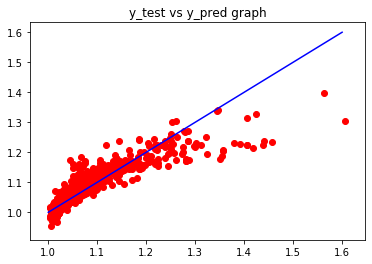

In [724]:
a=[1,1.6]
b=[1,1.6]
plt.scatter(y_test,y_pred,color='red')
plt.plot(a,b,color='blue')
plt.title("y_test vs y_pred graph")
plt.show()

<span style='background :yellow' ><span style='color :green' >2)RANDOM FORREST REGRESSION</span></span>

In [725]:
from sklearn.ensemble import RandomForestRegressor
regressor4=RandomForestRegressor(n_estimators=1500,random_state=1)
regressor4.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1500,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [726]:
y_pred=regressor4.predict(x_test)

ERROR

In [727]:
r2_score(y_test,y_pred)

0.8943300368434227

IN IDEAL CASE Y_TRAIN AND Y_PRED SHOULD BE EQUAL HENCE STRAIGHT LINE WITH SLOPE 1 SHOULD FORM WE CAN CHECK THE DEVIATION IN THE FOLLOWING GRAPH IN PREDICTION

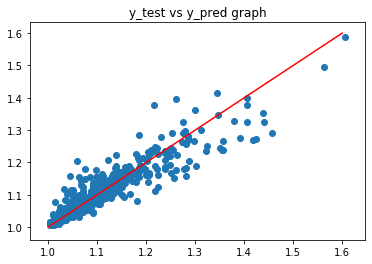

In [728]:
a=[1,1.6]
b=[1,1.6]
plt.scatter(y_test,y_pred)
plt.plot(a,b,color='red')
plt.title("y_test vs y_pred graph")
plt.show()

thanks!